In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Hitters.csv")
df.dropna(inplace=True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df = StandardScaler().fit_transform(df)

In [6]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [9]:
bilesen_df = pd.DataFrame(data=pca_fit, columns=["birinci bilesen", "ikinci bilesen"])

In [10]:
bilesen_df

,birinci bilesen,ikinci bilesen
0,0.076848,-1.653525
1,0.337127,2.320560
2,3.408362,-0.755757
3,-2.642221,0.361486
4,1.071681,1.511674
...,...,...
258,-0.152111,0.331665
259,3.241373,0.391942
260,-1.206322,0.625714
261,2.084856,2.059851


In [11]:
pca.explained_variance_ratio_ # açıklanma oranı

array([0.45245466, 0.24246801])

In [12]:
pca.components_[1]

array([ 0.38407792,  0.37764493,  0.22866298,  0.37459128,  0.31026531,
        0.23115759, -0.26820405, -0.19641268, -0.18589726, -0.13386448,
       -0.17692929, -0.17283361, -0.19698297,  0.16295204,  0.17624626,
        0.20978299,  0.05452611])

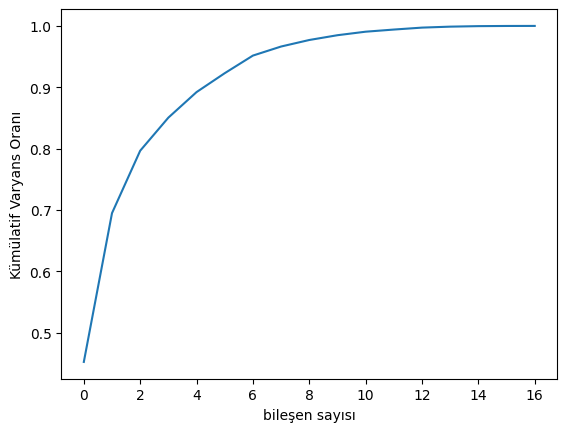

In [16]:
# optimum bilesen sayisi
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("bileşen sayısı")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [17]:
# final model
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [18]:
pca.explained_variance_ratio_ 

array([0.45245466, 0.24246801, 0.1016968 ])